In [1]:
include("../src/AHPQ.jl")
using .AHPQ

## Artificial Data Generation

In [2]:
using Plots
using Statistics: norm

In [3]:
n_dp = 1000
n_dim = 16
n_queries = 100
n_neighbors = 100

data = rand(n_dim, n_dp)
data = data ./ mapslices(norm, data, dims=1)
queries = rand(n_dim, n_queries)
innerproducts = data' * queries
groundtruth = mapslices(x -> partialsortperm(x, 1:n_neighbors, rev=true), innerproducts,dims=1);

## 16x1.000 Dataset and 8x8 codebook

In [4]:
n_codebooks = 8
n_centers   = 8
recalln = 20
stopcond= 2e-1;

### Finding optimal `T`

In [17]:
Ts = 0:0.1:1
scores = zeros(11)
for i in 1:length(Ts)
    traindata=deepcopy(data)
    ahpq = builder(traindata; T=Ts[i], n_codebooks=n_codebooks, 
                                    n_centers=n_centers,
                                    verbose=true,
                                    stopcond=stopcond,
                                    a=0,
                                    training_points=200,
                                    increment_steps=2)
    yhat = AHPQ.MIPS(ahpq, queries, n_neighbors)
    scores[i] = recall1atN(yhat, groundtruth, recalln)
end

0.1244345532349254


┌ Info: Starting incremental initialisation...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\builder.jl:73
┌ Info: 
│ 
│ Fitting quantizer on 20 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:74
┌ Info: Starting L2 Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:14
┌ Info: Iteration loss: 0.36275709366724956	Update distance:0.3048805903993764
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:27
┌ Info: Iteration loss: 0.31222164991501966	Update distance:0.14394341169531813
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:27
┌ Info: Product quantization converged after 2 iterations
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:30
┌ Info: 
│ 
│ Fitting quantizer on 200 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:79
┌ Info: Starting L2 Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ

0.08982639372512098



┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the number of data points.
│ 
│ Optimisation method changed to Approximate
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\codebook_update_step.jl:238
┌ Info: Iteration loss: 0.015567137681661883	Update distance:0.053853975910621917
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Info: Product quantization converged after 3 iterations
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:55
┌ Info: 
│ 
│ Fitting quantizer on 200 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:79
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:38
┌ Info: Iteration loss: 0.03429961920583804	Update distance:0.3437035909870494
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\qua

0.05375743736835446


┌ Info: Starting incremental initialisation...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\builder.jl:73
┌ Info: 
│ 
│ Fitting quantizer on 20 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:74
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:38
┌ Info: Iteration loss: 0.024266994105027164	Update distance:0.32296198915295776
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Info: Iteration loss: 0.013081381540997888	Update distance:0.0693422621659985
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Info: Product quantization converged after 2 iterations
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:55
┌ Info: 
│ 
│ Fitting quantizer on 200 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:79
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\A

0.26788585072220217


┌ Info: Starting incremental initialisation...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\builder.jl:73
┌ Info: 
│ 
│ Fitting quantizer on 20 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:74
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:38
┌ Info: Iteration loss: 0.017722817972153432	Update distance:0.29446090190547364
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Info: Iteration loss: 0.010454133111404031	Update distance:0.15777919504934573
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Info: Product quantization converged after 2 iterations
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:55
┌ Info: 
│ 
│ Fitting quantizer on 200 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:79
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\

0.07967566360627912


┌ Info: Starting incremental initialisation...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\builder.jl:73
┌ Info: 
│ 
│ Fitting quantizer on 20 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:74
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:38
┌ Info: Iteration loss: 0.013537444234937027	Update distance:0.3270576250981443
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Info: Iteration loss: 0.008120413401591173	Update distance:0.16756463454294698
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Info: Product quantization converged after 2 iterations
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:55
┌ Info: 
│ 
│ Fitting quantizer on 200 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:79
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\A

0.33027457953479444


┌ Info: Starting incremental initialisation...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\builder.jl:73
┌ Info: 
│ 
│ Fitting quantizer on 20 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:74
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:38
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the number of data points.
│ 
│ Optimisation method changed to Approximate
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\codebook_update_step.jl:238
┌ Info: Iteration loss: 0.009923510178751116	Update distance:0.3691781284172559
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the number 

0.3396175137223145


┌ Info: Starting incremental initialisation...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\builder.jl:73
┌ Info: 
│ 
│ Fitting quantizer on 20 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:74
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:38
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the number of data points.
│ 
│ Optimisation method changed to Approximate
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\codebook_update_step.jl:238
┌ Info: Iteration loss: 0.006173653321232376	Update distance:0.3652505950602663
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the number 

0.21241468962466395


┌ Info: Starting incremental initialisation...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\builder.jl:73
┌ Info: 
│ 
│ Fitting quantizer on 20 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:74
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:38
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the number of data points.
│ 
│ Optimisation method changed to Approximate
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\codebook_update_step.jl:238
┌ Info: Iteration loss: 0.003948387063656031	Update distance:0.4003766548576776
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the number 

0.3218054738346564


┌ Info: Starting incremental initialisation...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\builder.jl:73
┌ Info: 
│ 
│ Fitting quantizer on 20 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:74
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:38
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the number of data points.
│ 
│ Optimisation method changed to Approximate
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\codebook_update_step.jl:238
┌ Info: Iteration loss: 0.0022950026062931645	Update distance:0.41018662946607426
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the numbe

0.15511576339989613


┌ Info: Starting incremental initialisation...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\builder.jl:73
┌ Info: 
│ 
│ Fitting quantizer on 20 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:74
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:38
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the number of data points.
│ 
│ Optimisation method changed to Approximate
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\codebook_update_step.jl:238
┌ Info: Iteration loss: 0.0008187153465438392	Update distance:0.31194664732459143
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the numbe

0.38362411479926933


┌ Info: Starting incremental initialisation...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\builder.jl:73
┌ Info: 
│ 
│ Fitting quantizer on 20 data points...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:74
┌ Info: Starting Anisotropic Quantization...
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:38
┌ Warning: Singular Matrix encountered, some clusters do not contain assignments.
│ This happens when the number of clusters is relatively high ccompared to the number of data points.
│ 
│ Optimisation method changed to Approximate
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\codebook_update_step.jl:238
┌ Info: Iteration loss: 1.826712148003534e-6	Update distance:0.0005835346761209465
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:52
┌ Info: Product quantization converged after 1 iterations
└ @ Main.AHPQ C:\Users\Axel9\.julia\dev\AHPQ\src\quantizer\quantizer.jl:55
┌ Info: 
│ 
│ Fitting quantizer 

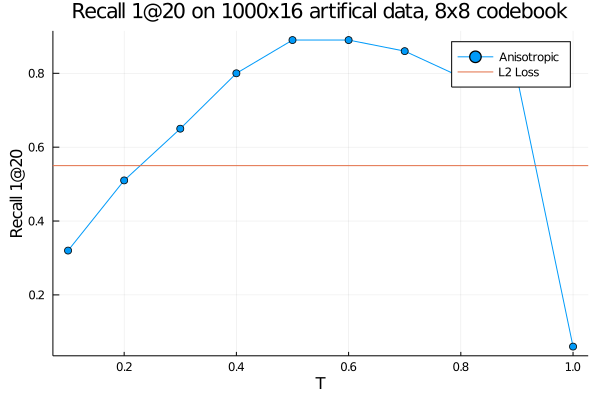

In [18]:
plot(Ts[2:end], scores[2:end], label="Anisotropic", marker=:dot)
hline!([scores[1]], label="L2 Loss")
plot!(title="Recall 1@$(recalln) on 1000x16 artifical data, $(n_codebooks)x$(n_centers) codebook", 
      xlabel="T",
      ylabel="Recall 1@$(recalln)")

### Comparison to L2 loss

In [ ]:
function get1atNscores(ranking, n_neighbors, groundtruth)
    scores = zeros(n_neighbors)
    for i in 1:n_neighbors
        scores[i] = recall1atN(ranking, groundtruth, i)
    end
    return scores
end

#### Training Tuned Anisotropic PQ

In [ ]:
traindata = deepcopy(data)
ahpq = builder(traindata, T=Ts[argmax(scores)], n_codebooks=n_codebooks, 
                                    n_centers=n_centers,
                                    verbose=true,
                                    stopcond=stopcond,
                                    a=0,
                                    training_points=-1);
yhat = AHPQ.MIPS(ahpq, queries, n_neighbors)
anisotropic_scores  = get1atNscores(yhat, n_neighbors, groundtruth);

#### Training L2 PQ

In [ ]:
traindata = deepcopy(data)
ahpq = builder(traindata, T=0, n_codebooks=n_codebooks, 
                                    n_centers=n_centers,
                                    verbose=true,
                                    stopcond=stopcond,
                                    a=0,
                                    training_points=-1);
yhat = AHPQ.MIPS(ahpq, queries, n_neighbors)
L2_scores  = get1atNscores(yhat, n_neighbors, groundtruth);

In [ ]:
plot(1:100, anisotropic_scores, label="Anisotropic")
plot!(1:100, L2_scores, label="L2")
plot!(title="Recall on 1000x16 artifical data, $(n_codebooks)x$(n_centers) codebook", 
      xlabel="N",
      ylabel="Recall 1@N",
      legend=:bottomright)

## 100x1.000 Dataset: Varying `n_codebooks`

In [ ]:
## Artificial Data Generation ##
n_dp = 1000
n_dim = 100
n_queries = 2000
n_neighbors = 100

data = rand(n_dim, n_dp)
data = data ./ mapslices(norm, data, dims=1)
queries = rand(n_dim, n_queries)
innerproducts = data' * queries
groundtruth = mapslices(x -> partialsortperm(x, 1:n_neighbors, rev=true), innerproducts,dims=1);

In [ ]:
n_centers = 16
n_codebooks = [2, 5, 10, 25, 50, 100]
nrecall = 20
stopcond=1e-2;

### Tuning `T`

In [ ]:
Ts = 0.001:0.1:1
scores = zeros(length(Ts))
for i in 1:length(Ts)
    traindata=deepcopy(data)
    ahpq = builder(traindata; T=Ts[i], n_codebooks=5, 
                                    n_centers=n_centers,
                                    verbose=false,
                                    stopcond=stopcond,
                                    a=0,
                                    training_points=-1,
                                    optimisation="nesterov")
    yhat = MIPS(ahpq, queries, n_neighbors)
    scores[i] = recall1atN(yhat, groundtruth, recalln)
end
print("Optimal T found at $(Ts[argmax(scores)])")

In [ ]:
plot(Ts, scores[1:10], marker=:dot)
plot!(title="Recall 1@$(nrecall) on 1000x16 artifical data, 5x$(n_centers) codebook", 
      xlabel="T",
      ylabel="Recall 1@$(nrecall)")

### Performing tests

In [ ]:
euclidean_errors = zeros(length(n_codebooks))
euclidean_scores = zeros(length(n_codebooks))
for i in 1:length(n_codebooks)
    traindata=deepcopy(data)
    ahpq = builder(traindata; T=0, n_codebooks=n_codebooks[i], 
                                    n_centers=n_centers,
                                    verbose=false,
                                    stopcond=stopcond,
                                    a=0,
                                    training_points=-1)
    euclidean_errors[i] = approx_error(ahpq.qd, data, groundtruth, queries)
    yhat = MIPS(ahpq, queries, n_neighbors)
    euclidean_scores[i] = recallN(yhat, groundtruth, nrecall)
end

In [ ]:
anisotropic_errors = zeros(length(n_codebooks))
anisotropic_scores = zeros(length(n_codebooks))
for i in 1:length(n_codebooks)
    traindata=deepcopy(data)
    ahpq = builder(traindata; T=Ts[argmax(scores)], n_codebooks=n_codebooks[i], 
                                    n_centers=n_centers,
                                    verbose=false,
                                    stopcond=stopcond,
                                    a=0,
                                    training_points=-1)
    anisotropic_errors[i] = approx_error(ahpq.qd, data, groundtruth, queries)
    yhat = MIPS(ahpq, queries, n_neighbors)
    anisotropic_scores[i] = recallN(yhat, groundtruth, nrecall)
end

In [ ]:
plot(n_codebooks, anisotropic_errors, marker=:dot, label="Anisotropic")
plot!(n_codebooks, euclidean_errors, marker=:dot, label="Reconstruction")
plot!(title="Relative Error on Top-1 of Artificial Dataset", 
      xlabel="N Codebooks",
      ylabel="| < q, x-̃x > - < q, x > |")

In [ ]:
plot(n_codebooks, anisotropic_scores, marker=:dot, label="Anisotropic")
plot!(n_codebooks, euclidean_scores, marker=:dot, label="Reconstruction")
plot!(title="Recall10 on 1000x100 artifical data", 
      xlabel="N Codebooks",
      ylabel="Recall 10@10",
      legend=:bottomright)